<h1> Vehicle Price Predictor</h1>

<h3>  Libraries</h3>

In [216]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')


In [217]:
df =pd.read_csv('data/carData.csv')

# Data Cleaning and displaying dataframe info

In [218]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [219]:
df.shape

(19237, 18)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [221]:
# Check Duplication
df.duplicated().sum()

313

# Dropping duplicate values


In [222]:
# drop duplicate values
df.drop_duplicates(inplace= True)

In [223]:
# check Missing value
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [224]:
# Check the number of unique values of each column
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [225]:
# Check statistic of dataset
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### Checking unique values for each column

In [226]:
for col in df.columns:
    print(f'Category in {col} is :\n {df[col].unique()}\n')
    print('\\'*50)

Category in ID is :
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Price is :
 [13328 16621  8467 ... 56814 63886 22075]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'


# Dropping columns and transforming data types
- I drop 'ID' and 'Doors' as they are not necessary for predicting prices.
- I calculate the vehicle age based on the current year and the production year, creating a new 'Age' column.
- I drop the original 'Prod. year' column after calculating the age.
- I remove the 'Km' unit from the 'Mileage' column to convert it to a numeric format.
- I convert the 'Mileage' column to the 'Int64' data type for more accurate representation.
- I remove the 'Turbo' label from the 'Engine volume' column to ensure consistency.
- I convert the 'Engine volume' column to the 'float64' data type for more accurate representation.
- I replace '-' with '0' in the 'Levy' column.
- I convert the 'Levy' column to the 'float64' data type for more accurate representation.

In [227]:
df=df.drop(['ID','Doors'],axis=1)

dtime = dt.datetime.now()
df['Age']=dtime.year - df['Prod. year']

df = df.drop('Prod. year',axis=1)


df['Mileage'] =df['Mileage'].str.replace('km',"")

df.Mileage = df.Mileage.astype('Int64')

df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')

df['Engine volume'] = df['Engine volume'].astype('float64')

df['Levy']=df['Levy'].replace('-','0')

df['Levy'] = df['Levy'].astype('float64')
# Rename the 'Levy' column to 'Lien'
df = df.rename(columns={'Levy': 'Lien'})

In [228]:
df.head()

,Price,Lien,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9


# Data visualization

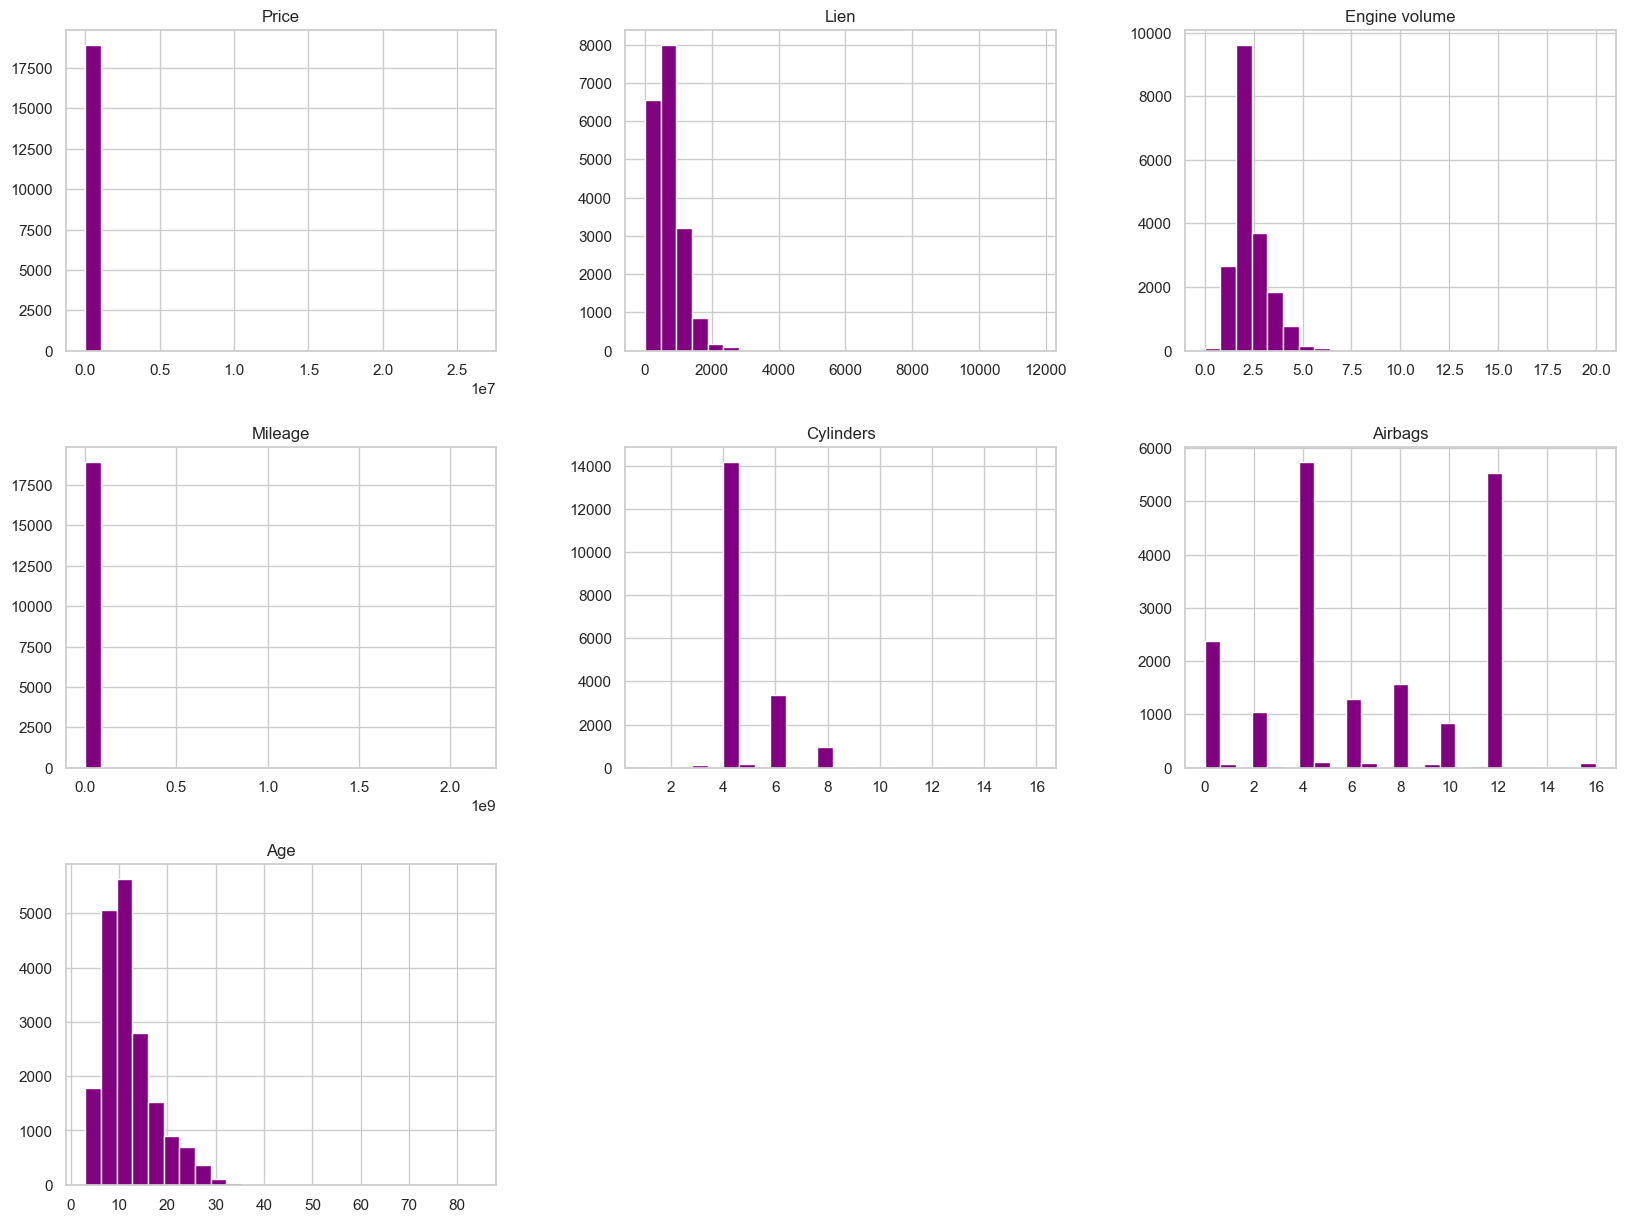

In [229]:
df.hist(bins=25,figsize=(20,15),color='purple')
plt.show()

1- in Levy column: Most values between more than 0 and less than 2000

2- Most Engine valume in range (1 to 5)

3- Mileage for most cars are 0.0 (most cars are new)

4- in Airbags column: Most cars have 3 to 5 airbags or 13 airbags

5- in Age column: Most cars are 13 years old, but we have some very old cars

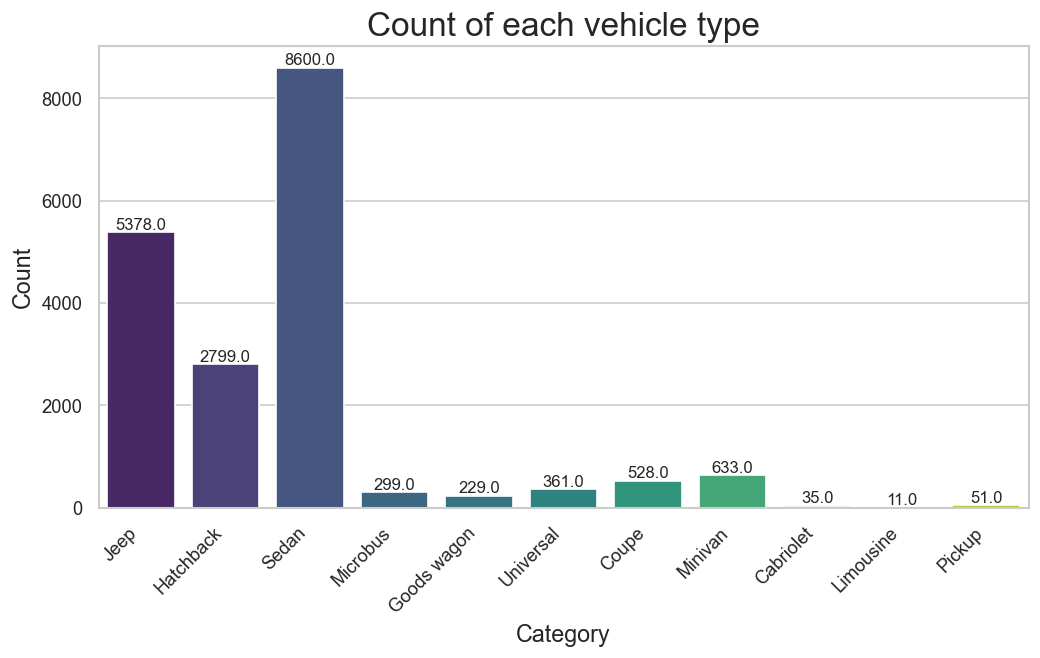

In [230]:
plt.subplots(figsize=(10, 5), dpi=120)
category_plot = sns.countplot(data=df, x='Category', palette='viridis')  # Change the palette to 'viridis'

# Add count annotations on top of the bars
for p in category_plot.patches:
    category_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=10)

plt.title("Count of each vehicle type", fontsize=20)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Most types of Categories are Sedan, Hatchback, and Jeep.

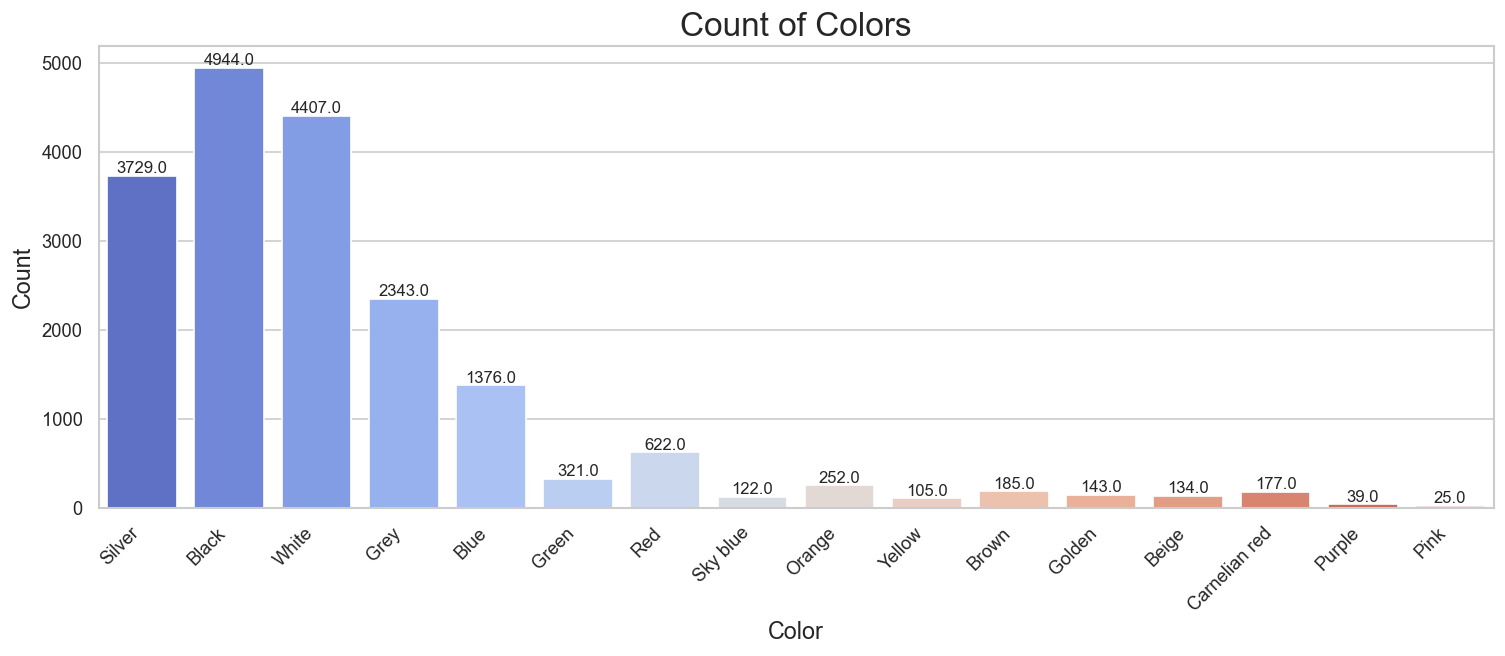

In [231]:
plt.subplots(figsize=(15, 5), dpi=120)
color_plot = sns.countplot(data=df, x='Color', palette='coolwarm')  # Change the palette to 'coolwarm'

# Add count annotations on top of the bars
for p in color_plot.patches:
    color_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10)

plt.title("Count of Colors", fontsize=20)
plt.xlabel("Color", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


- The most sold car colors are Black, Silver,White and Grey.

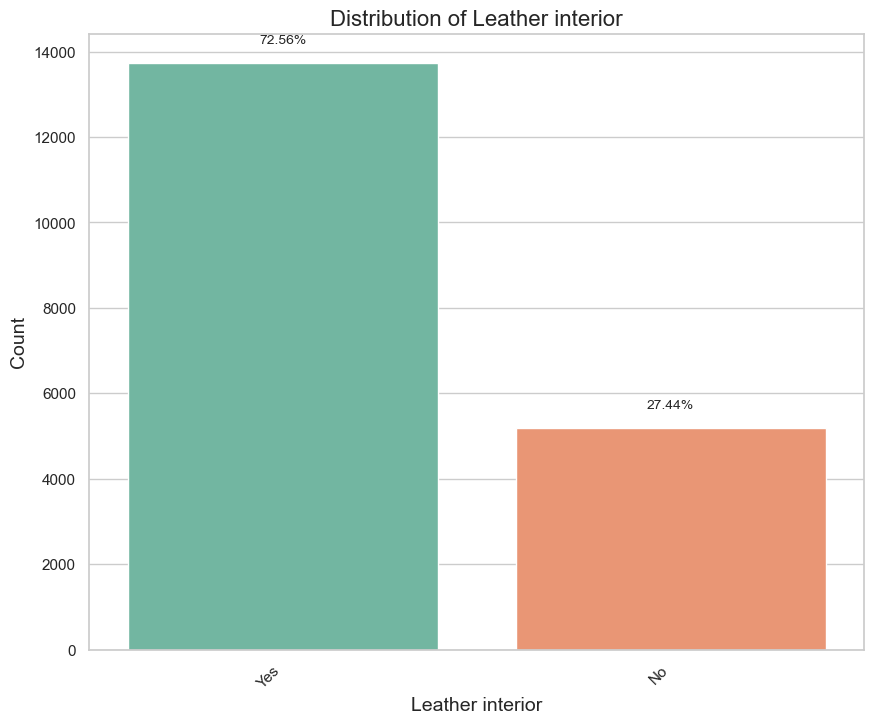

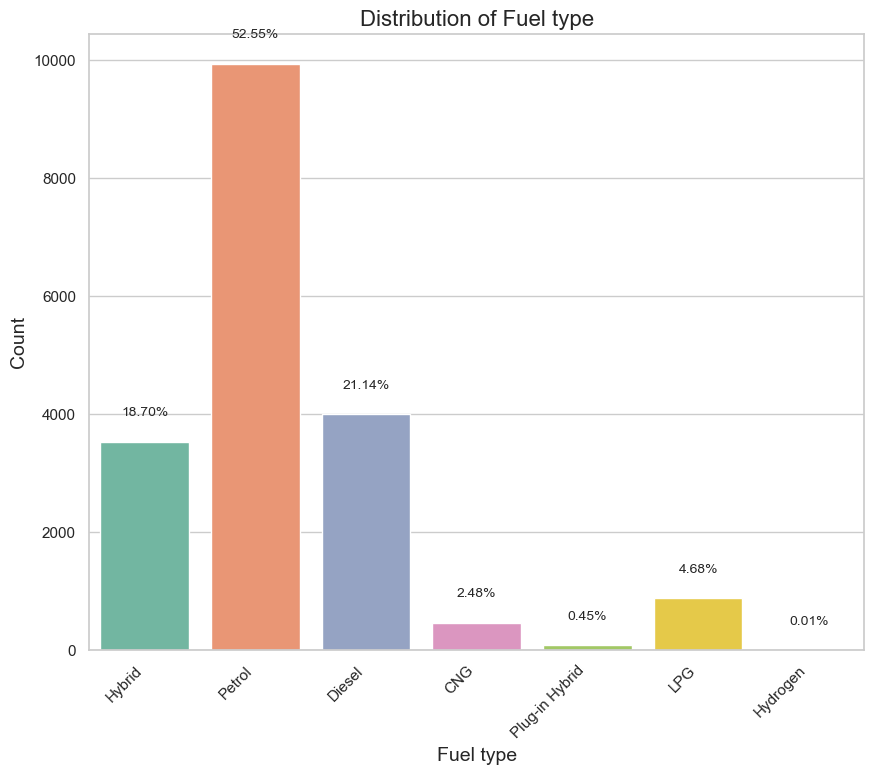

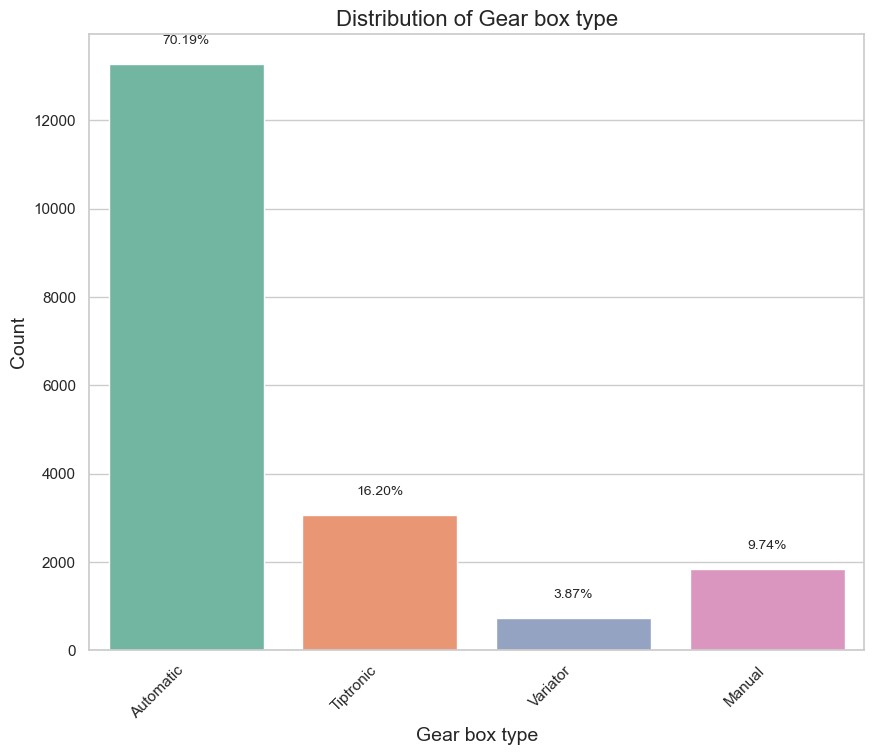

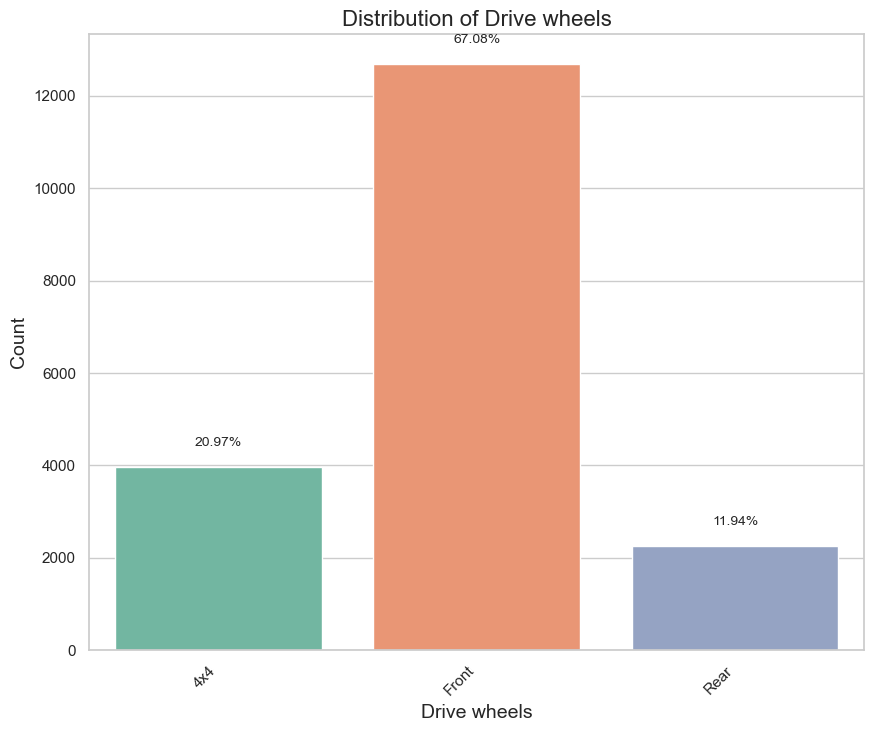

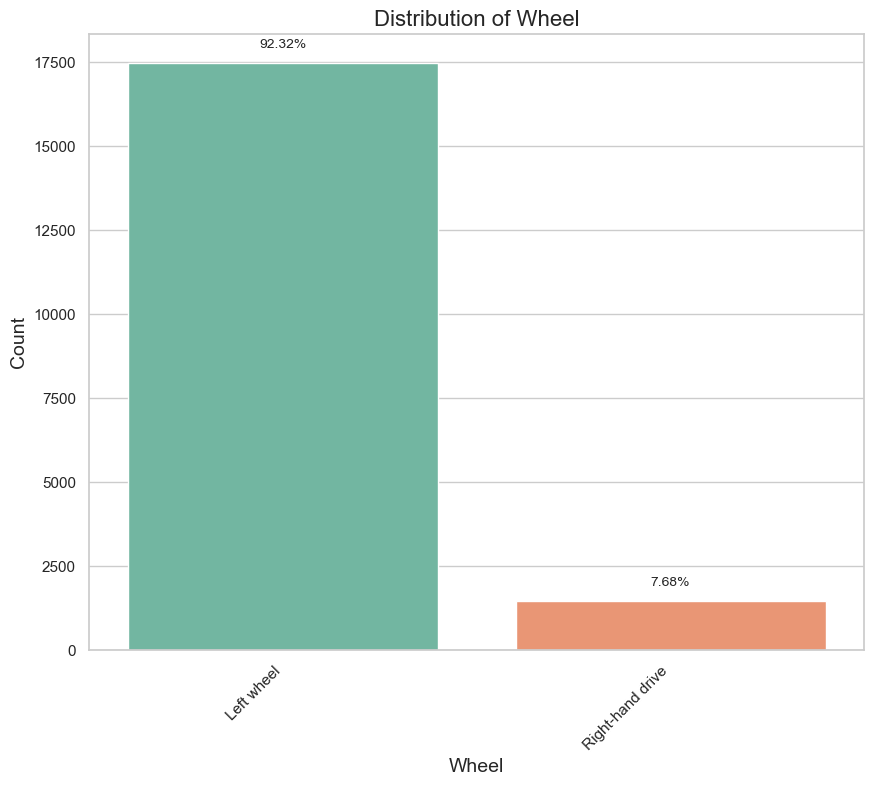

In [232]:
columns = ['Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel']

for col in columns:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=col, palette='Set2')  # Change the palette to 'Set2'
    
    # Add annotations
    total_count = len(df[col])
    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.02 * total_count,
                 f'{p.get_height() / total_count:.2%}', ha='center', va='bottom', fontsize=10)

    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

In [233]:
top_10_cars = df.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

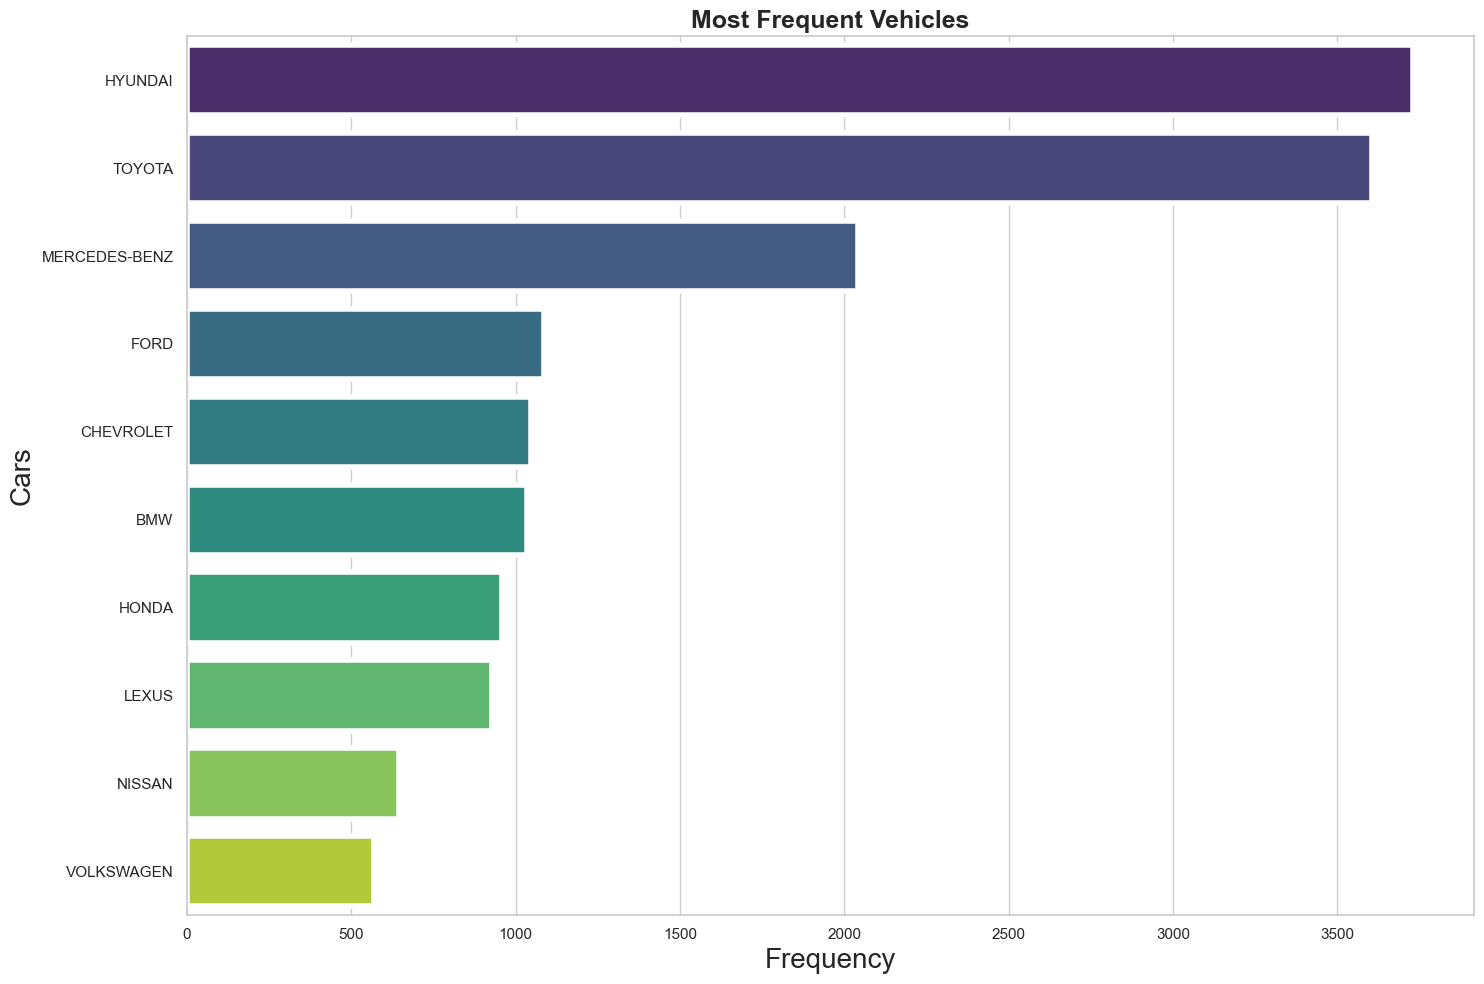

In [234]:
plt.figure(figsize=(15, 10))
sns.barplot(x=top_10_cars, y=top_10_cars.index, palette='viridis', linewidth=4)
plt.title('Most Frequent Vehicles', loc='center', fontweight='bold', fontsize=18)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Cars', fontsize=20)
plt.tight_layout()
plt.show()


In [235]:
# Calculate average price for top 10 cars 
top_10_cars_means_prices = [df[df['Manufacturer']==i]['Price'].mean() for i in list(top_10_cars.index)]


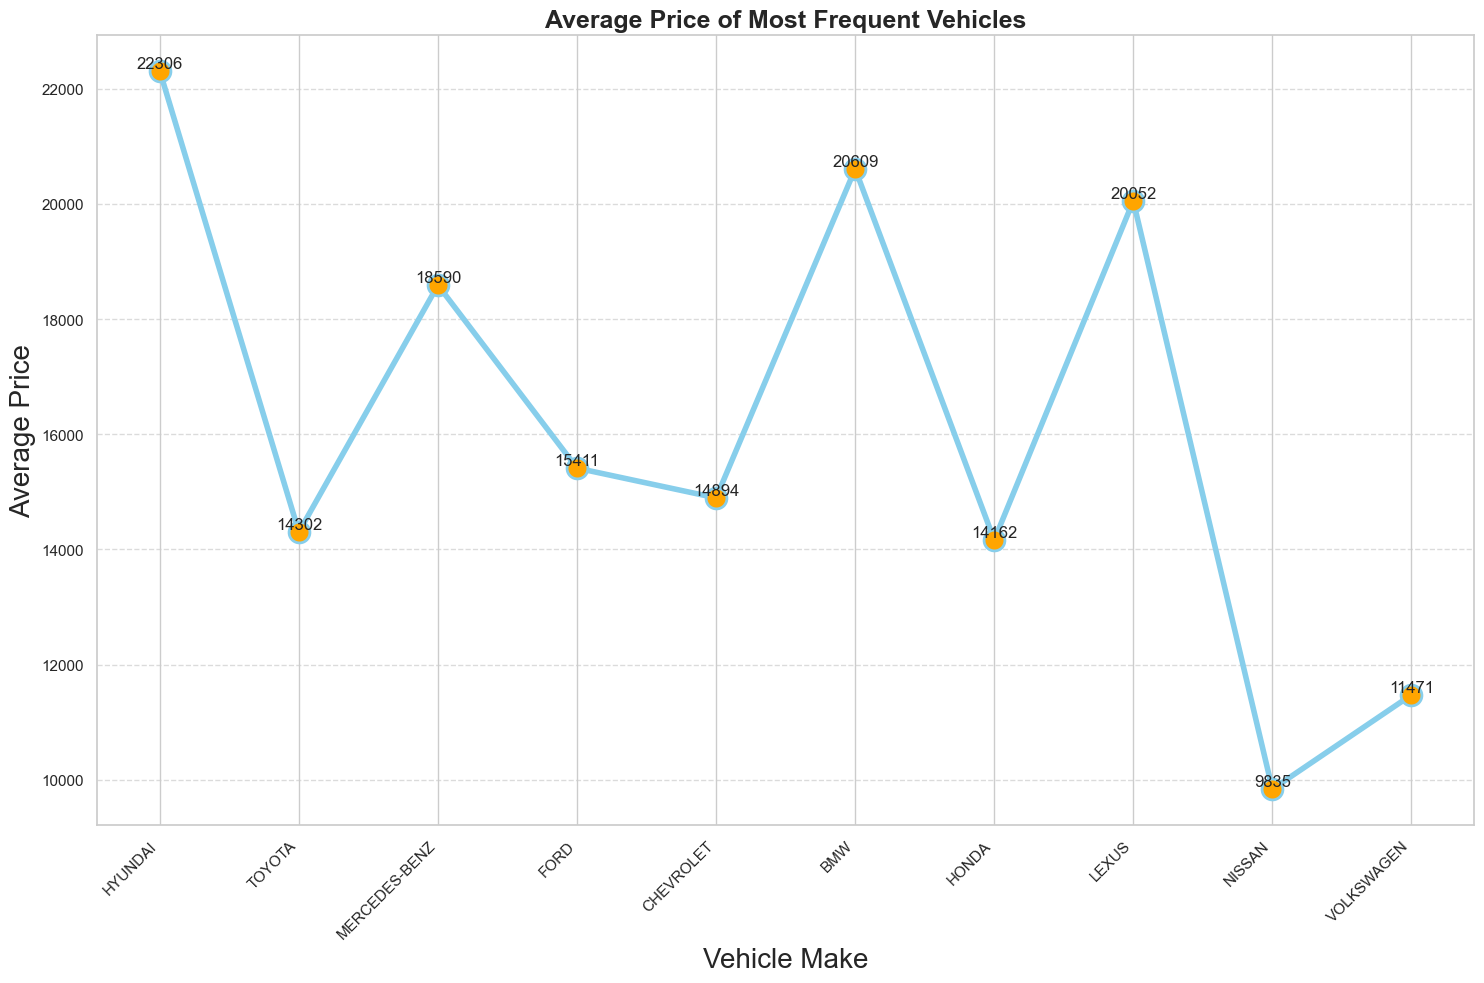

In [236]:
plt.figure(figsize=(15, 10))
price_plot = plt.plot(top_10_cars.index, top_10_cars_means_prices, color='skyblue',  # Change color to 'skyblue'
                      linewidth=4, marker='o', markersize=15, markerfacecolor='orange', markeredgewidth=2)
plt.title('Average Price of Most Frequent Vehicles', loc='center', fontweight='bold', fontsize=18)
plt.ylabel('Average Price', fontsize=20)
plt.xlabel('Vehicle Make', fontsize=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on each marker point
for i, txt in enumerate(top_10_cars_means_prices):
    plt.annotate(f'{int(txt)}', (top_10_cars.index[i], txt), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.show()


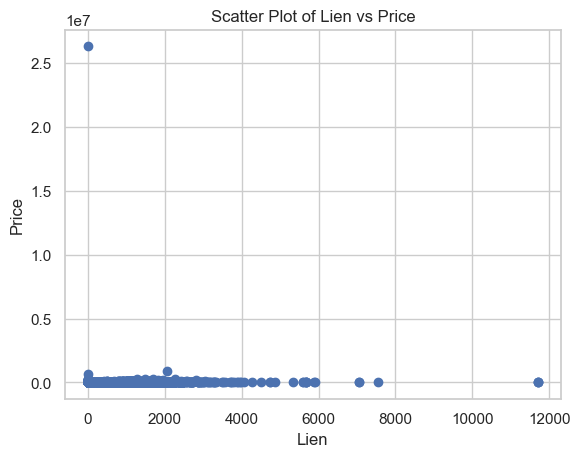

In [237]:
plt.scatter(df['Lien'], df['Price'])

# Add labels and title
plt.xlabel('Lien')
plt.ylabel('Price')
plt.title('Scatter Plot of Lien vs Price')

# Show the plot
plt.show()

- Color doesn't affect on car's price

In [238]:
# Correlation Analysis
cor= df.select_dtypes(exclude=object).corr()
cor

,Price,Lien,Engine volume,Mileage,Cylinders,Airbags,Age
Price,1.000000,-0.003558,0.008888,-0.001763,0.007435,-0.012709,-0.012689
Lien,-0.003558,1.000000,0.378117,-0.021203,0.251632,0.125015,-0.362827
Engine volume,0.008888,0.378117,1.000000,-0.006292,0.777228,0.221991,0.032427
Mileage,-0.001763,-0.021203,-0.006292,1.000000,-0.001720,-0.009174,0.064058
Cylinders,0.007435,0.251632,0.777228,-0.001720,1.000000,0.174112,0.099443
Airbags,-0.012709,0.125015,0.221991,-0.009174,0.174112,1.000000,-0.235160
Age,-0.012689,-0.362827,0.032427,0.064058,0.099443,-0.235160,1.000000


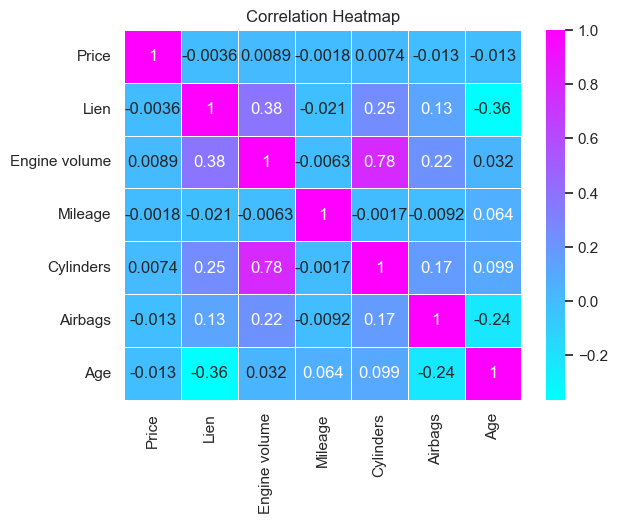

In [239]:
sns.heatmap(cor, annot=True, linewidths=0.5, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()


### Detect OutLier

In [240]:
# Lets define the numeric columns
numeric_data = df.select_dtypes(exclude=object)


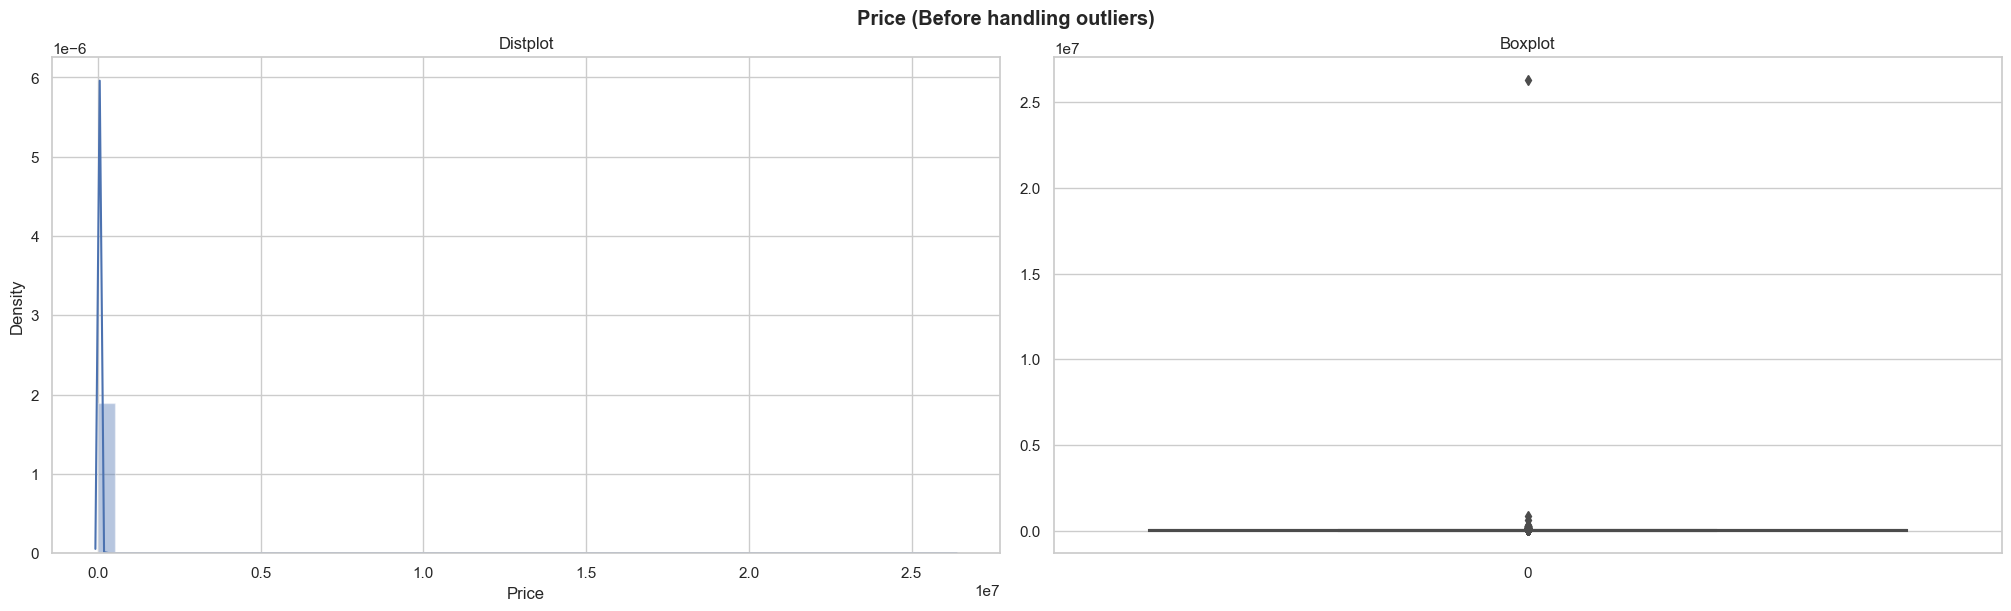

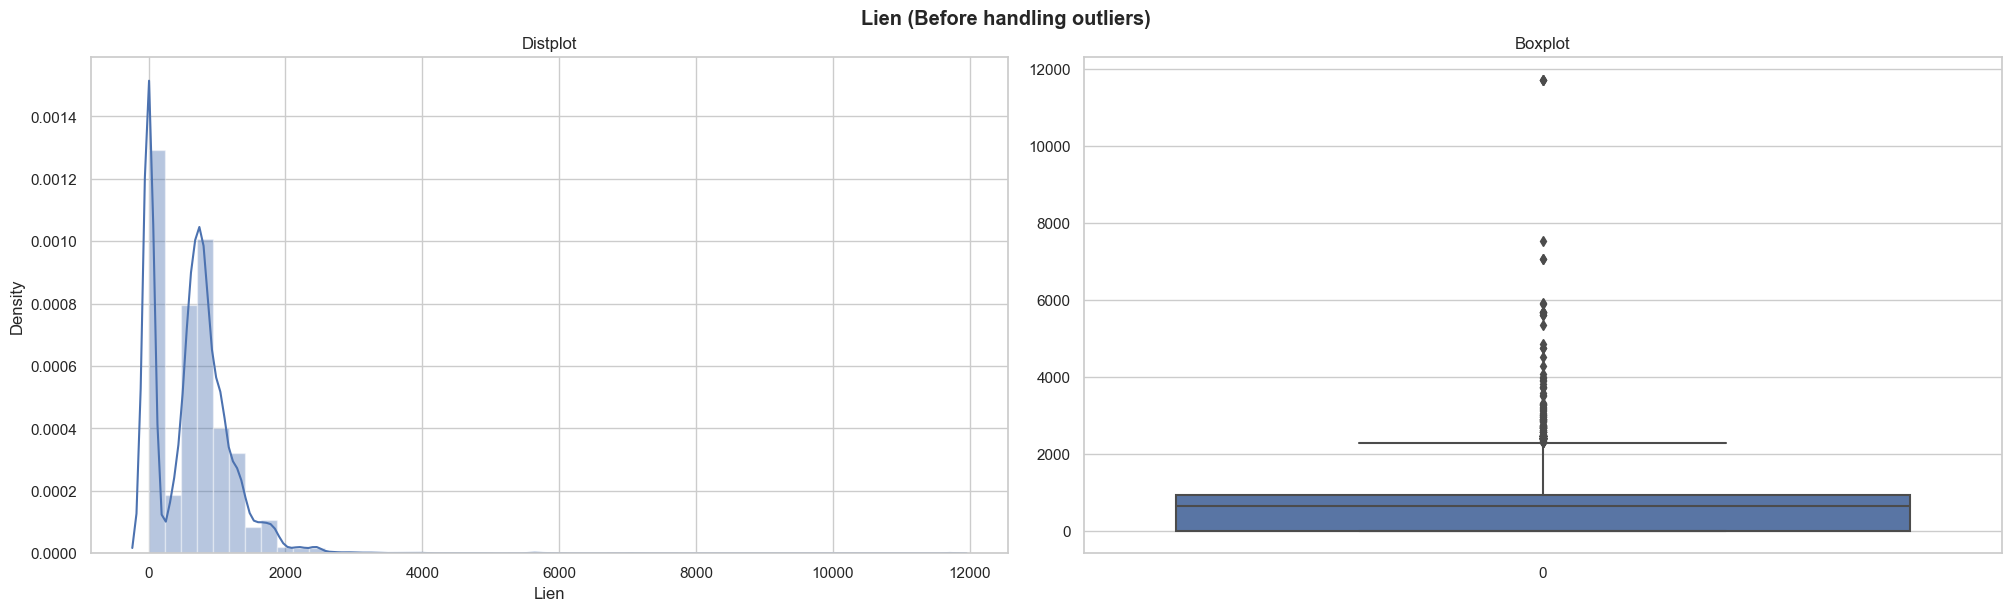

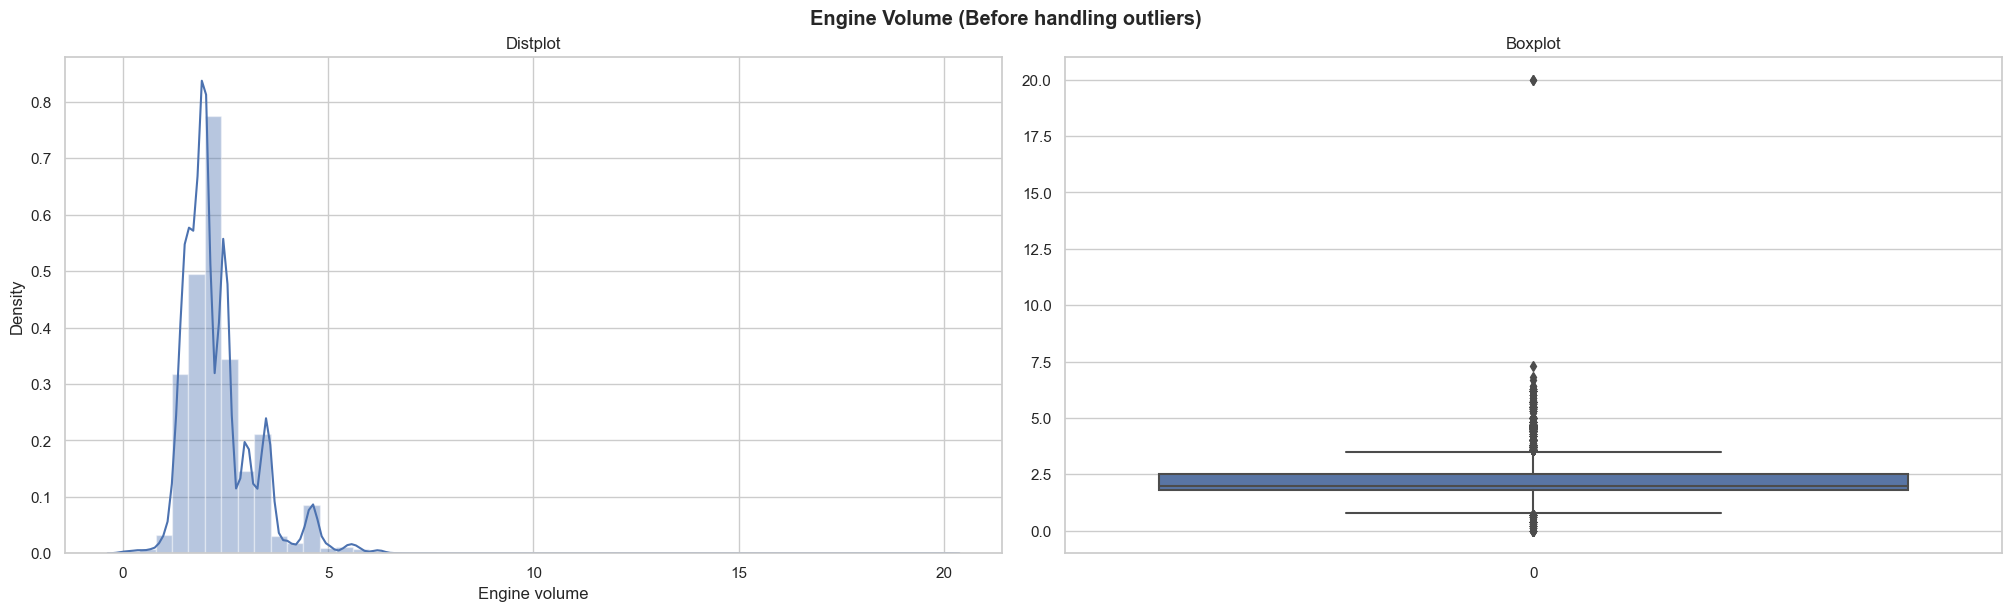

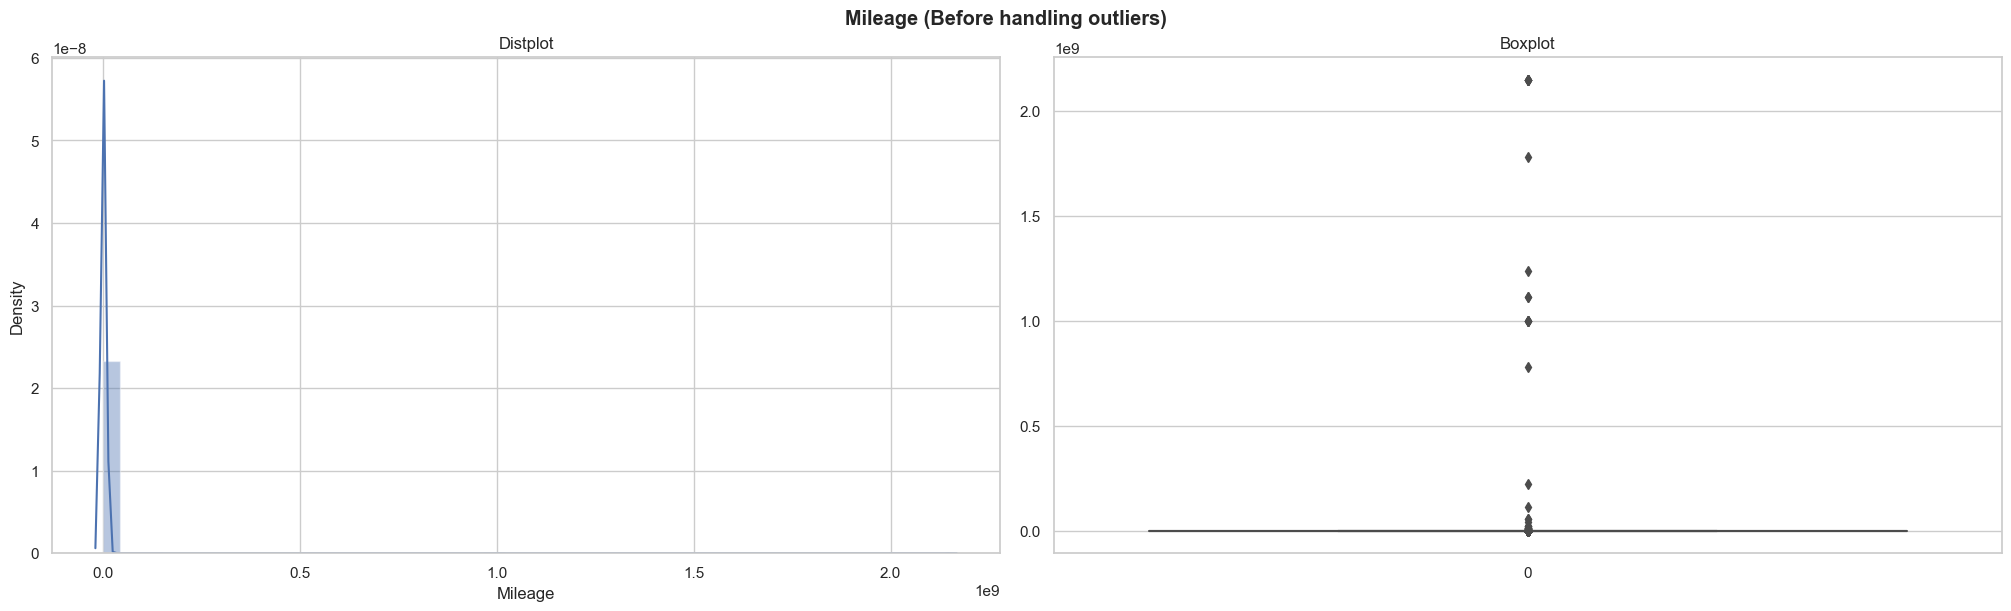

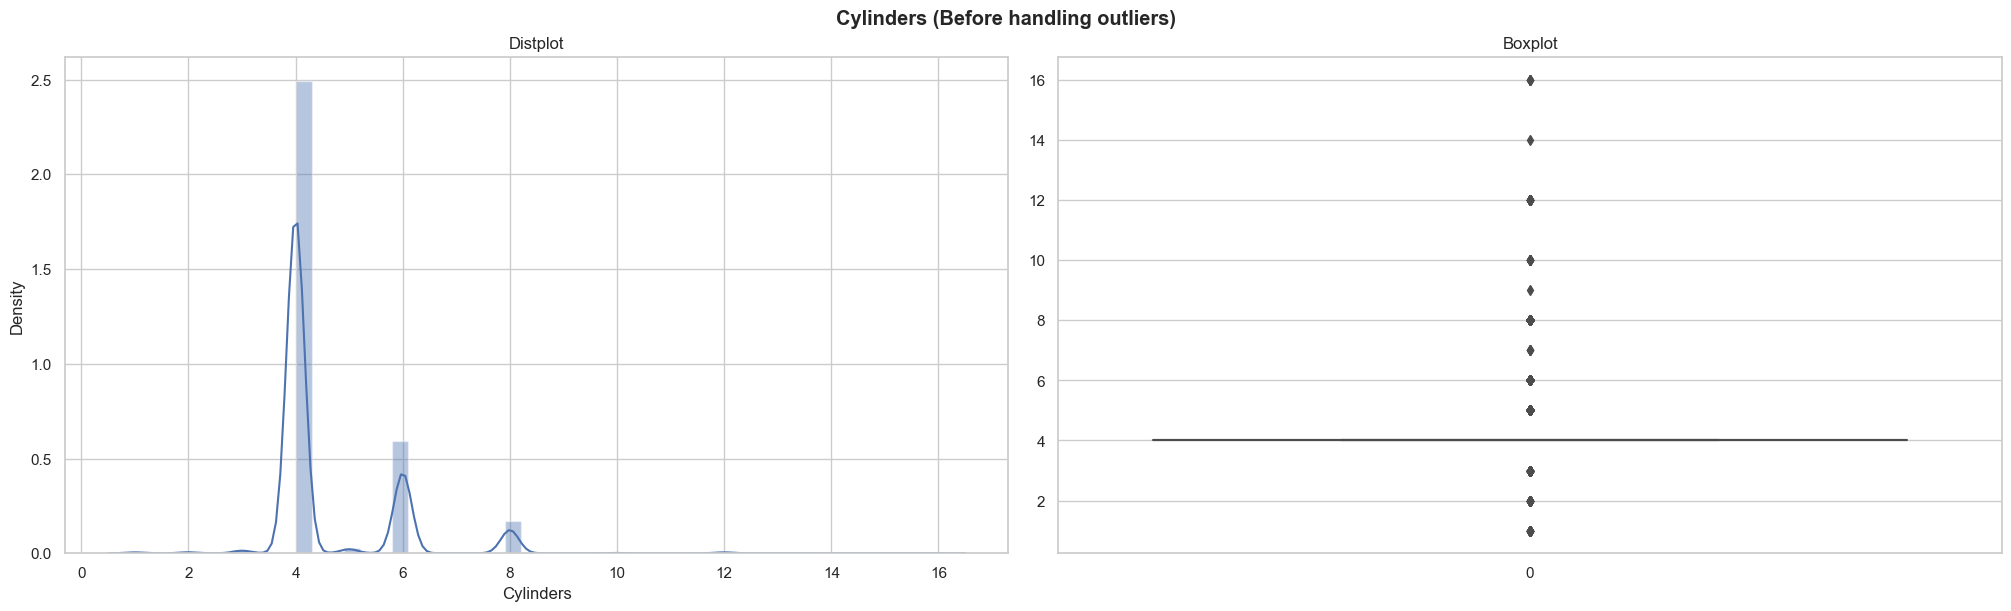

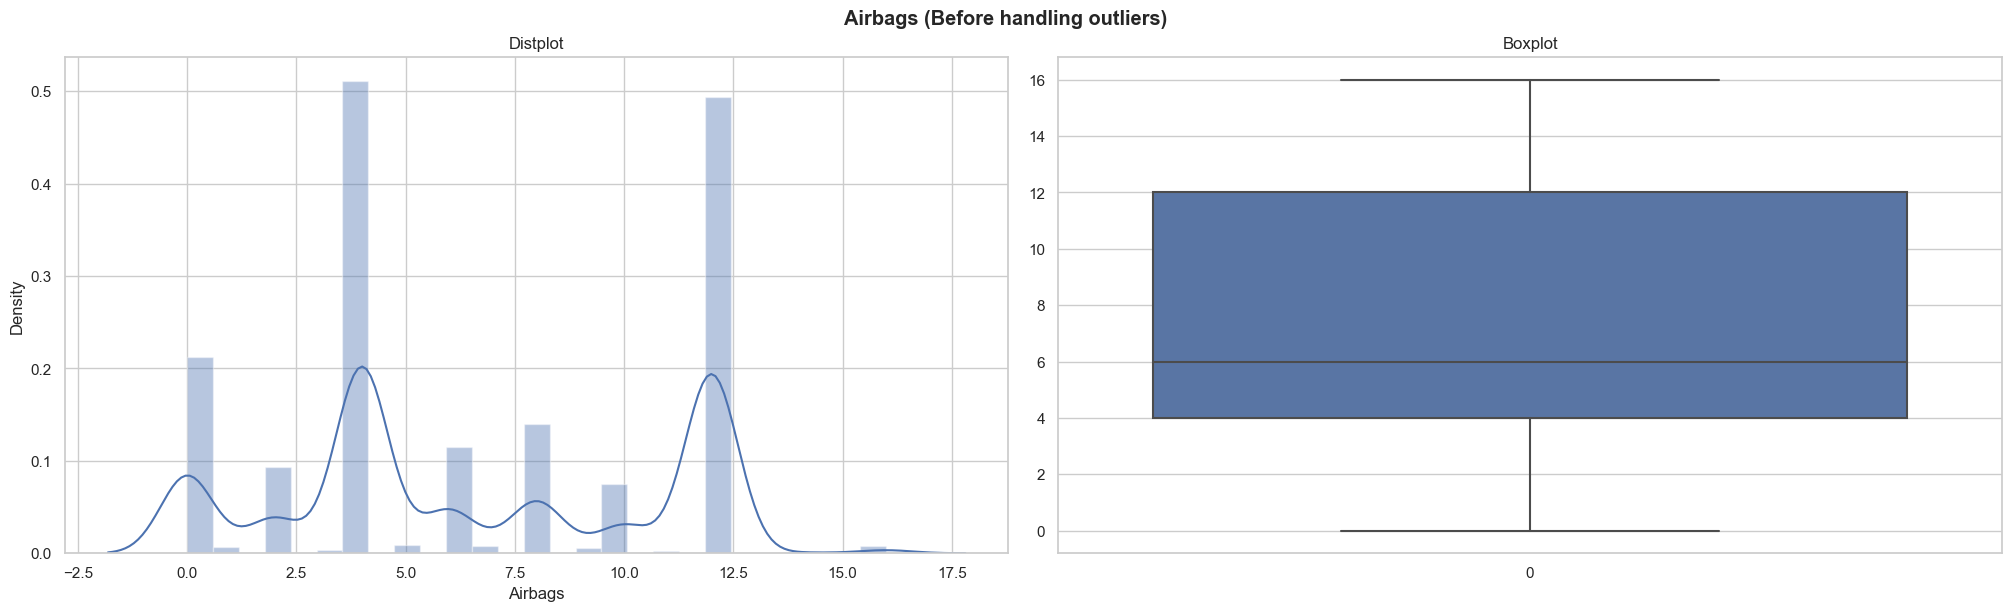

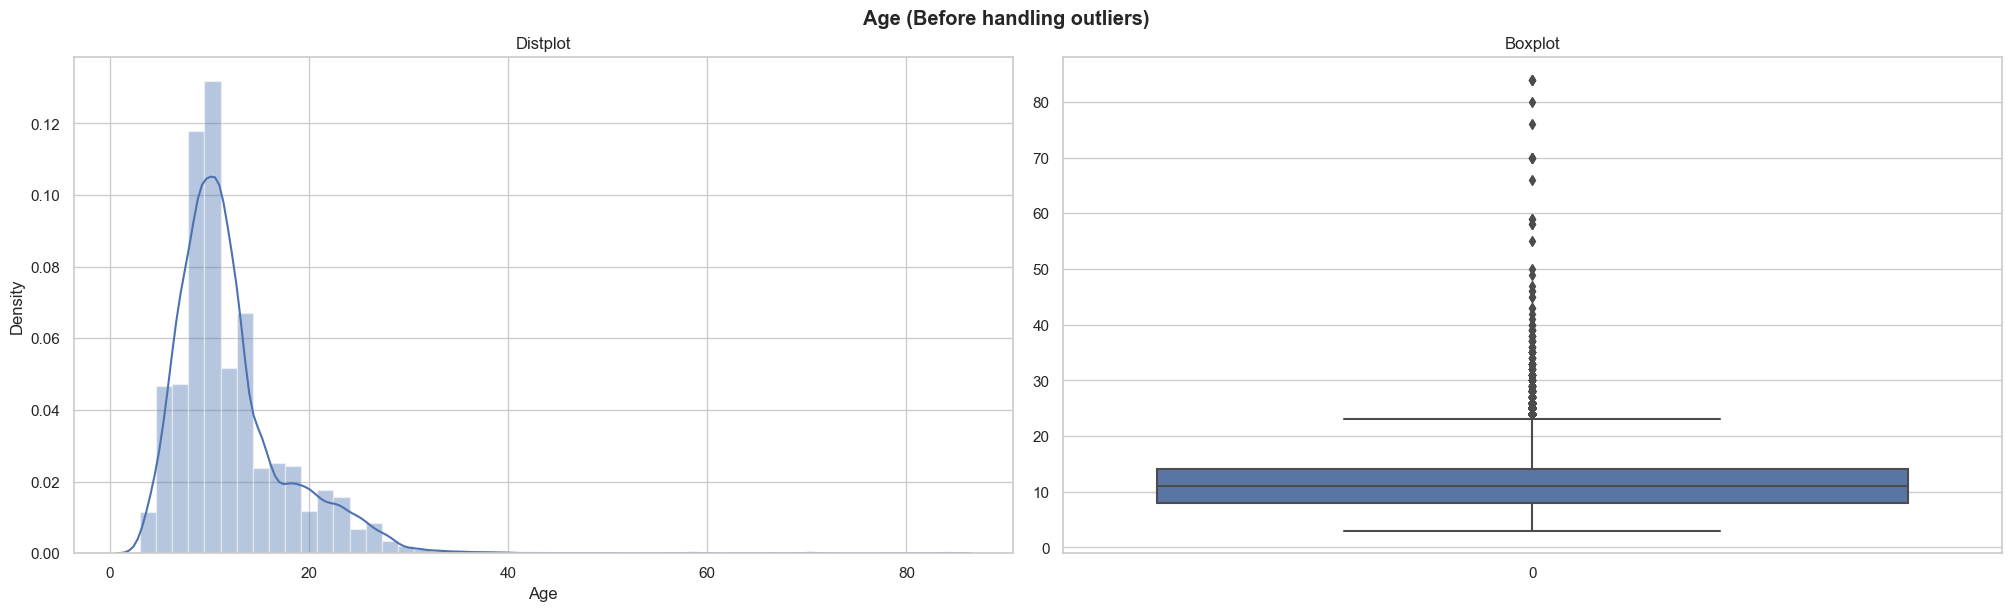

In [241]:
#Plotting Graphs Before treating outliers of continous features
for col in numeric_data:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

In [242]:
for col in numeric_data:
    q1 = df[col].quantile(0.75)
    q2 = df[col].quantile(0.25)
    iq = q1 - q2
    
    low = q2-1.5*iq
    high = q1-1.5*iq
    outlier = ((numeric_data[col]>high) | (numeric_data[col]<low)).sum()

    total = numeric_data[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")


Total Outliers in Price are :18924---100.0%
Total Outliers in Lien are :18924---100.0%
Total Outliers in Engine volume are :17625---93.14%
Total Outliers in Mileage are :17703---93.55%
Total Outliers in Cylinders are :4765---25.18%
Total Outliers in Airbags are :16540---87.4%
Total Outliers in Age are :18082---95.55%


In [243]:
if outlier>0:
    df = df.loc[(df[col]<=high) & (df[col]>=low) ]

# Transform Data

- Convert all object columns to numerical 

In [244]:
obdata = df.select_dtypes(include=object)
numdata = df.select_dtypes(exclude=object)

In [245]:
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = lab.fit_transform(obdata.iloc[:,i])  

In [246]:
df = pd.concat([obdata,numdata],axis=1)

In [247]:
df

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Lien,Engine volume,Mileage,Cylinders,Airbags,Age
15,30,23,3,1,3,0,1,0,14,549,1079.0,2.0,74146,4.0,12,5
36,30,24,3,0,3,2,1,0,11,51746,1077.0,2.0,10200,4.0,12,4
56,19,80,3,1,3,2,0,0,7,87112,0.0,2.0,5323,4.0,0,4
59,4,53,7,0,3,0,1,0,11,23521,781.0,1.4,22000,4.0,6,5
81,30,180,7,1,3,0,1,0,14,7527,830.0,1.5,27656,4.0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19155,9,75,5,0,1,0,1,1,7,24000,2266.0,1.5,19000,4.0,0,5
19157,13,20,7,1,3,0,1,0,2,3607,1077.0,2.0,23474,4.0,12,4
19180,10,149,7,1,2,0,1,0,12,63886,1076.0,2.0,5305,4.0,4,3
19182,30,30,7,1,1,0,1,0,1,9722,609.0,2.5,127515,4.0,12,5


# Model

In [248]:
x= df.drop('Price',axis=1)
y= df['Price']

In [249]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [250]:
algorithm = ['LinearRegression']
R2 = []
RMSE = []


In [251]:
def models(model, algorithm):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test, pre)
    rmse = np.sqrt(mean_squared_error(y_test, pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test, y_test)
    print(f'The Score of {algorithm} is: {score}')
    return model, r2, rmse


In [252]:
model1 = LinearRegression()


In [253]:
model1, r2, rmse = models(model1, 'Linear Regression')


The Score of Linear Regression is: 0.48162737395538724


In [254]:
df = pd.DataFrame({'Algorithm': algorithm, 'R2_score': R2, 'RMSE': RMSE})
df

,Algorithm,R2_score,RMSE
0,LinearRegression,0.481627,25718.06456


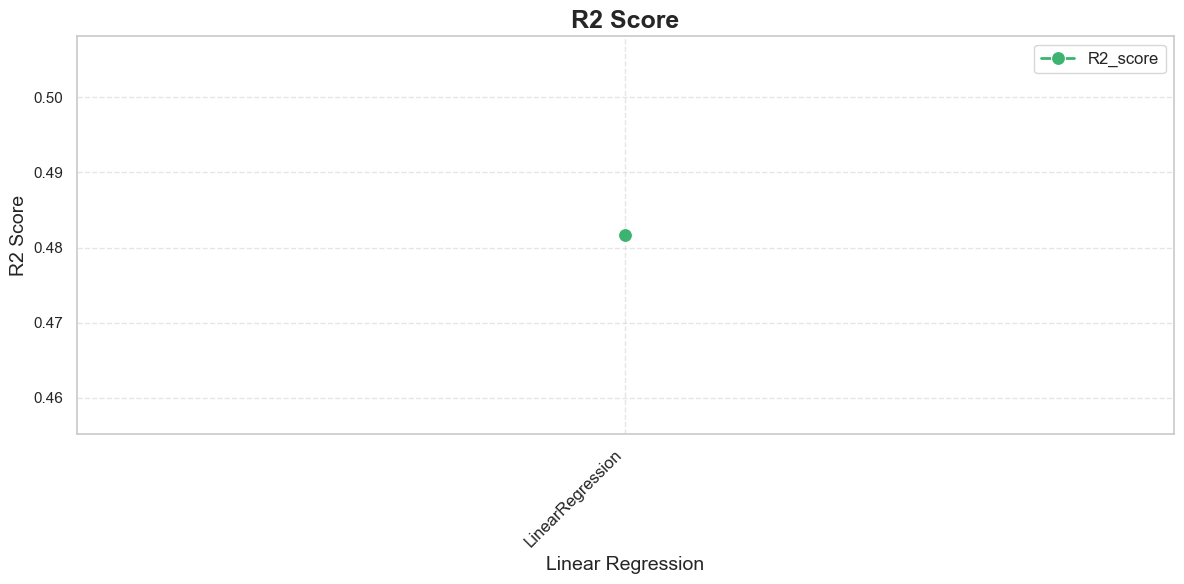

In [255]:
# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the R2_score
sns.lineplot(data=df, x='Algorithm', y='R2_score', marker='o', markersize=10, color='mediumseagreen', linewidth=2, label='R2_score')

# Set labels and title
ax.set_xlabel('Linear Regression', fontsize=14)
ax.set_ylabel('R2 Score', fontsize=14)
ax.set_title('R2 Score', fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend with adjusted fontsize
ax.legend(fontsize=12)

# Add grid for better visualization
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

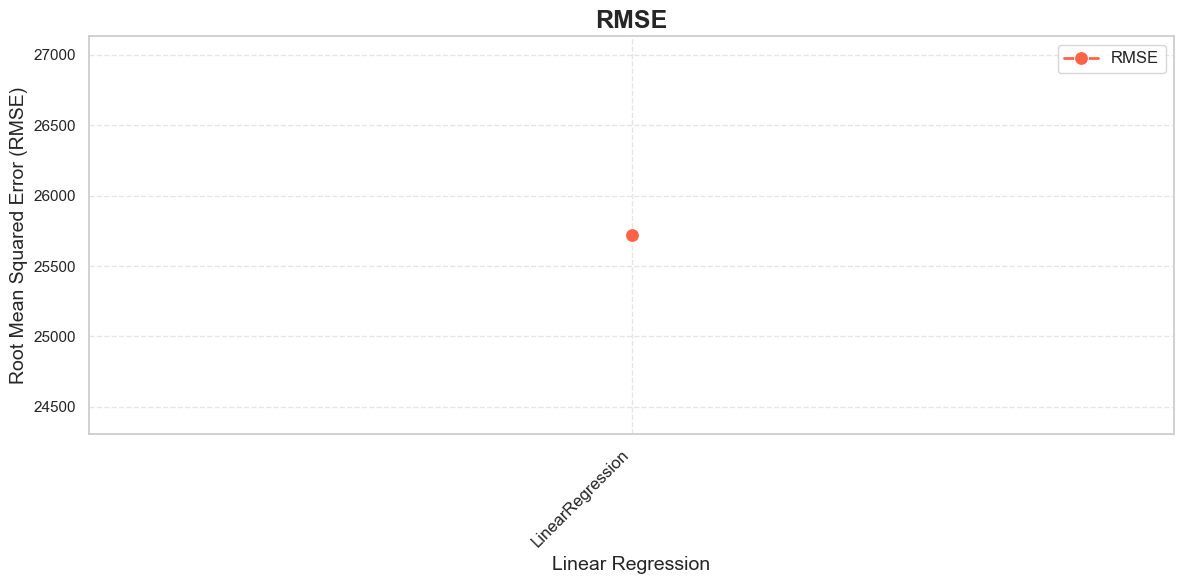

In [256]:
# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the RMSE
sns.lineplot(data=df, x='Algorithm', y='RMSE', marker='o', markersize=10, color='tomato', linewidth=2, label='RMSE')

# Set labels and title
ax.set_xlabel('Linear Regression', fontsize=14)
ax.set_ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
ax.set_title('RMSE', fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend with adjusted fontsize
ax.legend(fontsize=12)

# Add grid for better visualization
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [257]:

# Create a Random Forest Regressor
rf_model = RandomForestRegressor()

# Define the hyperparameters and their potential values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_rf_model.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error: 553325355.376578
R2 Score: 0.5663432939249948
